In [2]:
import cv2
import extcolors

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from colormap import rgb2hex

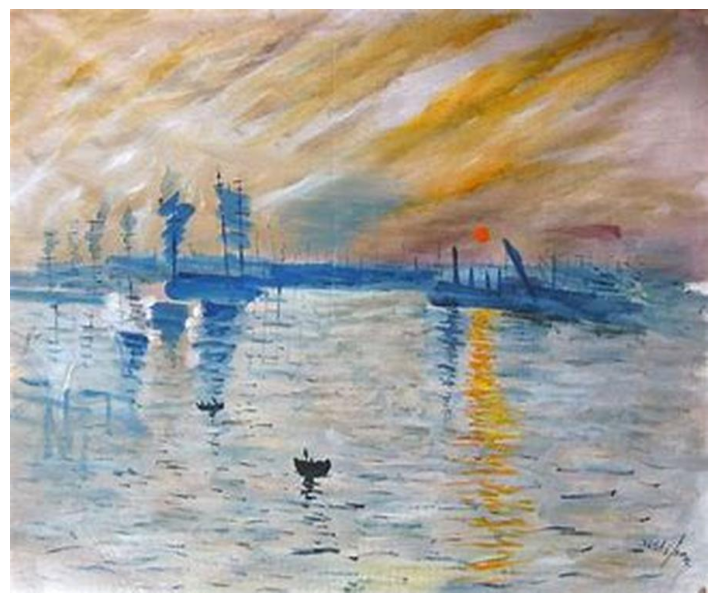

In [10]:
input_name = 'C:\\Users\\cheny\\Desktop\\OIP.jpeg'
output_width = 900                   #set the output size
img = Image.open(input_name)
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize), Image.Resampling.LANCZOS)

#save
resize_name = 'resize_.jpeg'  #the resized image name
img.save(resize_name)                 #output location can be specified before resize_name

#read
plt.figure(figsize=(9, 9))
img_url = resize_name
img = plt.imread(img_url)
plt.imshow(img)
plt.axis('off')
plt.show()

In [13]:
colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit=16)
colors_x

([((186, 164, 166), 154516),
  ((188, 193, 197), 138224),
  ((145, 151, 163), 72527),
  ((210, 181, 137), 58475),
  ((161, 130, 102), 49900),
  ((206, 189, 169), 41527),
  ((187, 146, 66), 27372),
  ((60, 103, 138), 27069),
  ((135, 116, 118), 20808),
  ((104, 133, 137), 10128),
  ((149, 147, 135), 7486),
  ((106, 148, 173), 7017),
  ((152, 180, 201), 6033),
  ((227, 226, 232), 5953),
  ((170, 134, 82), 5446),
  ((173, 123, 24), 5352)],
 677700)

In [19]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
list(df_color['c_code'])

['#BAA4A6',
 '#BCC1C5',
 '#9197A3',
 '#D2B589',
 '#A18266',
 '#CEBDA9',
 '#BB9242',
 '#3C678A',
 '#877476',
 '#688589',
 '#959387',
 '#6A94AD',
 '#98B4C9',
 '#E3E2E8',
 '#AA8652']

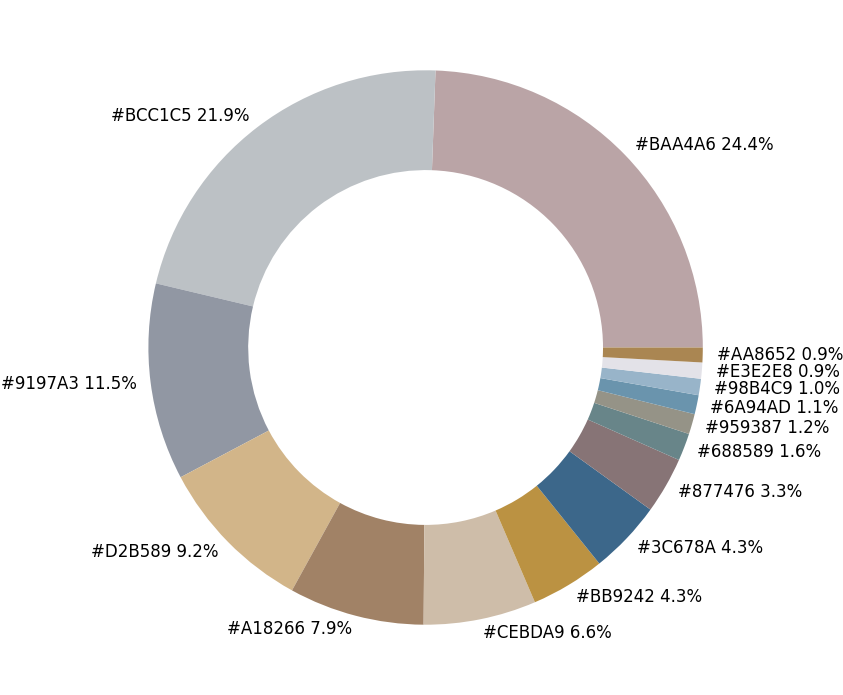

In [15]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

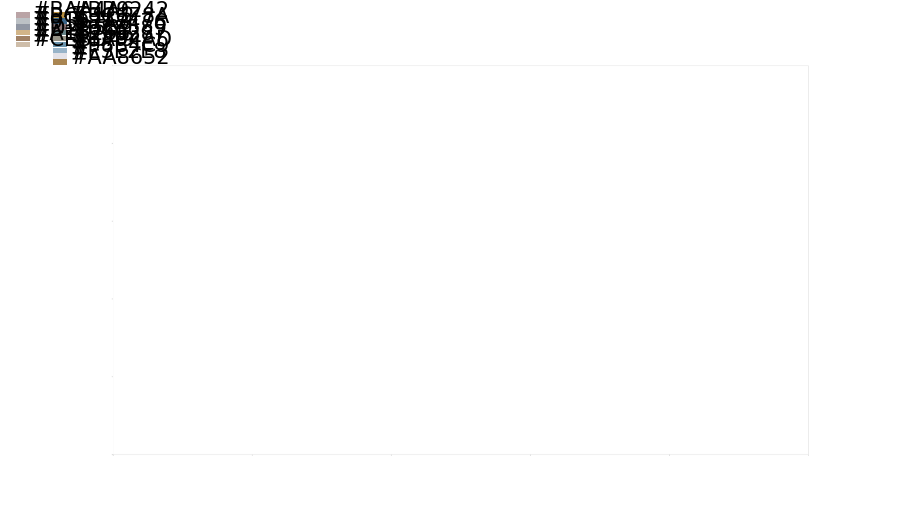

In [16]:
#create background color
fig, ax = plt.subplots(figsize=(192,108),dpi=100)
fig.set_facecolor('white')
plt.savefig('bg.png')
plt.close(fig)

#create color palette
bg = plt.imread('bg.png')
fig = plt.figure(figsize=(90, 90), dpi = 10)
ax = fig.add_subplot(1,1,1)

x_posi, y_posi, y_posi2 = 320, 25, 25
for c in list_color:
    if  list_color.index(c) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor = c)
        ax.add_patch(rect)
        ax.text(x = x_posi+360, y = y_posi+80, s = c, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor = c)
        ax.add_artist(rect)
        ax.text(x = x_posi+1160, y = y_posi2+80, s = c, fontdict={'fontsize': 150})
        
ax.axis('off')
plt.imshow(bg)
plt.tight_layout()

In [ ]:
img = mpimg.imread('shazam.jpg')
bg = plt.imread('bg.png')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)

#donut plot
wedges, text = ax1.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 160, 'color':'black'})
plt.setp(wedges, width=0.3)

#add image in the center of donut plot
imagebox = OffsetImage(img, zoom=2.3)
ab = AnnotationBbox(imagebox, (0, 0))
ax1.add_artist(ab)

#color palette
x_posi, y_posi, y_posi2 = 160, -170, -170
for c in list_color:
    if list_color.index(c) <= 5:
        y_posi += 180
        rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
        ax2.add_patch(rect)
        ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
    else:
        y_posi2 += 180
        rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
        ax2.add_artist(rect)
        ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

ax2.axis('off')
fig.set_facecolor('white')
plt.imshow(bg)       
plt.tight_layout()